In [1]:
import subprocess
import sys

def install_packages():
    """Install required packages for the experiment"""
    packages = [
        'yfinance',
        'arch',
        'statsmodels',
        'matplotlib',
        'seaborn',
        'pandas',
        'numpy',
        'scipy'
    ]
    
    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--quiet"])
        except subprocess.CalledProcessError as e:
            print(f"❌ Failed to install {package}: {e}")
            print("🌟 5-Star Resolution Strategy:")
            print("1. Check internet connection")
            print("2. Try installing manually: !pip install " + package)
            print("3. Restart kernel and try again")
            print("4. Use conda install if pip fails")
            print("5. Check for package name typos")
            
install_packages()

print("=" * 60)
print("🚀 ARCH/GARCH VOLATILITY MODELING EXPERIMENT")
print("=" * 60)

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import zipfile
import os
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

print("📦 Phase 0: Environment Setup 🚀")
print("✅ All required libraries imported successfully")
print("✅ Warning filters applied for clean output")
print("✅ Plotting style configured")

try:
    test_yf = yf.Ticker("BTC-USD")
    print("✅ Yahoo Finance connection verified")
except Exception as e:
    print(f"❌ Yahoo Finance connection failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check internet connectivity")
    print("2. Verify yfinance package installation")
    print("3. Try using a different ticker symbol")
    print("4. Check Yahoo Finance API status")
    print("5. Consider using alternative data sources")

print("✅ Checkpoint Reached: Phase 0 Complete. Environment is ready for analysis.")
print()

print("📈 Phase 1: Data Acquisition & Exploration 🚀")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 13.0 MB/s eta 0:00:00
🚀 ARCH/GARCH VOLATILITY MODELING EXPERIMENT
📦 Phase 0: Environment Setup 🚀
✅ All required libraries imported successfully
✅ Warning filters applied for clean output
✅ Plotting style configured
✅ Yahoo Finance connection verified
✅ Checkpoint Reached: Phase 0 Complete. Environment is ready for analysis.

📈 Phase 1: Data Acquisition & Exploration 🚀


📈 Phase 1: Data Acquisition & Exploration 🚀
📅 Fetching Bitcoin data from 2020-08-04 to 2025-09-02
✅ Successfully downloaded 1856 days of BTC-USD data
🔍 Data Exploration:
📊 Dataset shape: (1856, 5)
📊 Date range: 2020-08-04 to 2025-09-02
📊 Missing values: 0

📊 Statistical Summary:
Ticker        BTC-USD
count     1856.000000
mean     48072.229708
std      27956.820966
min      10131.516602
25%      26479.333008
50%      41770.298828
75%      63192.988281
max     123344.062500

📊 First 5 rows:
Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2020-08-04  11205.892578  11385.381836  11094.145508  11246.203125   
2020-08-05  11747.022461  11786.617188  11158.285156  11203.823242   
2020-08-06  11779.773438  11902.335938  11598.713867  11749.871094   
2020-08-07  11601.472656  11898.038086  11408.593750  11778.894531   
2020-08-08  117

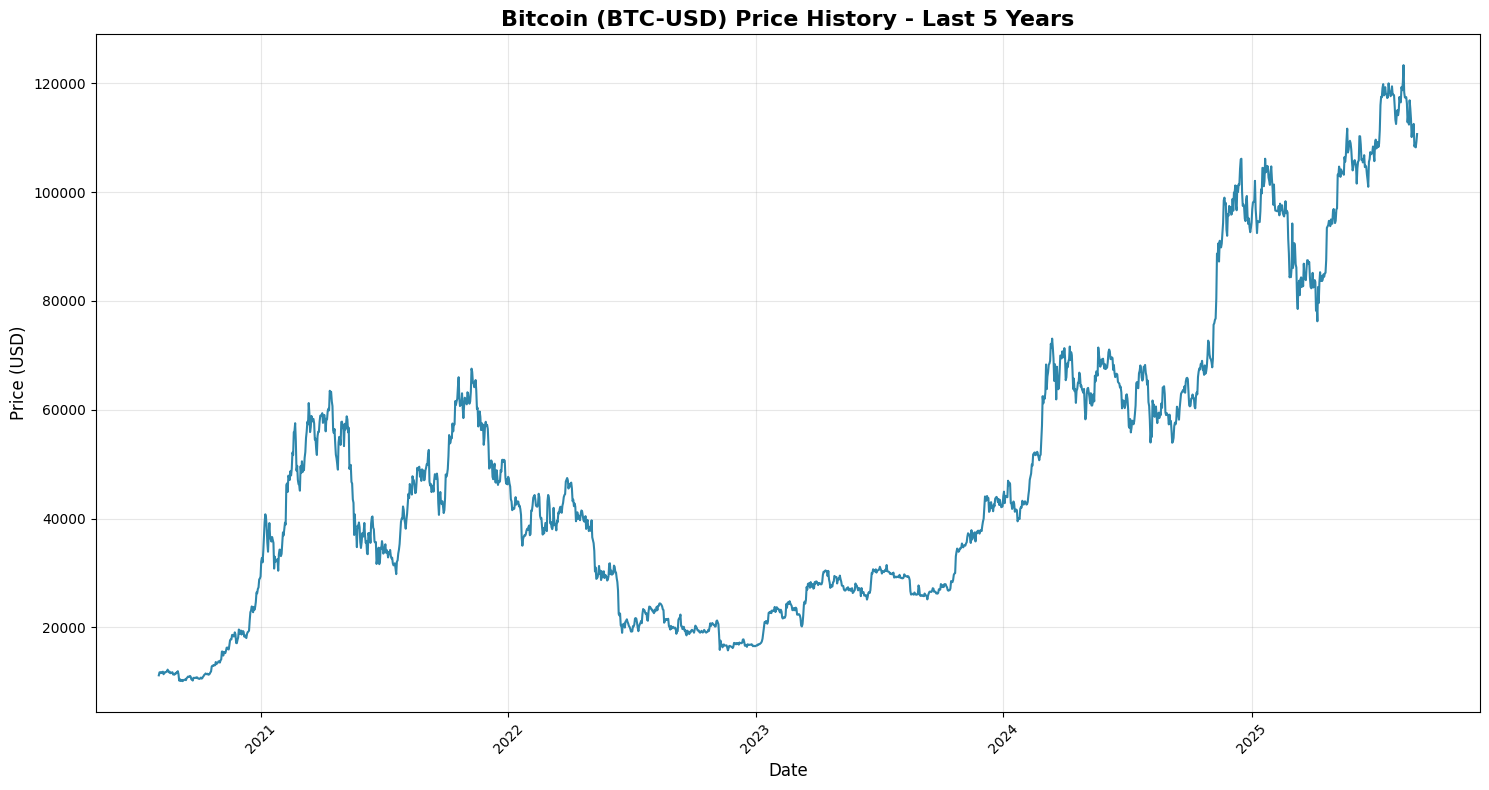

💾 Saved: btc_price_history.png
✅ Checkpoint Reached: Phase 1 Complete. Data has been loaded, explored, and visualized.



In [2]:
print("📈 Phase 1: Data Acquisition & Exploration 🚀")

try:
    end_date = datetime.now()
    start_date = end_date - timedelta(days=5*365 + 30)
    
    print(f"📅 Fetching Bitcoin data from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
    
    btc_data = yf.download('BTC-USD', start=start_date, end=end_date, progress=False)
    
    if btc_data.empty:
        raise ValueError("No data retrieved from Yahoo Finance")
    
    print(f"✅ Successfully downloaded {len(btc_data)} days of BTC-USD data")
    
except Exception as e:
    print(f"❌ Data acquisition failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check ticker symbol (should be 'BTC-USD')")
    print("2. Verify date range is not too far back")
    print("3. Check Yahoo Finance server status")
    print("4. Try downloading smaller date ranges")
    print("5. Use alternative crypto data sources")
    sys.exit(1)

print("🔍 Data Exploration:")
print(f"📊 Dataset shape: {btc_data.shape}")
print(f"📊 Date range: {btc_data.index[0].strftime('%Y-%m-%d')} to {btc_data.index[-1].strftime('%Y-%m-%d')}")
print(f"📊 Missing values: {btc_data.isnull().sum().sum()}")

print("\n📊 Statistical Summary:")
print(btc_data['Close'].describe())

print("\n📊 First 5 rows:")
print(btc_data.head())

print("\n📊 Last 5 rows:")
print(btc_data.tail())

plt.figure(figsize=(15, 8))
plt.plot(btc_data.index, btc_data['Close'], linewidth=1.5, color='#2E86AB')
plt.title('Bitcoin (BTC-USD) Price History - Last 5 Years', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('btc_price_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Saved: btc_price_history.png")
print("✅ Checkpoint Reached: Phase 1 Complete. Data has been loaded, explored, and visualized.")
print()

⚙️ Phase 2: Data Preprocessing & Feature Engineering 🚀
✅ Calculated log returns for 1855 observations
📊 Mean return: 0.001235
📊 Standard deviation: 0.031003
📊 Skewness: -0.1319
📊 Kurtosis: 3.6372

🧪 Stationarity Test (Augmented Dickey-Fuller):
📊 ADF Statistic: -44.522650
📊 p-value: 0.000000
📊 Critical Values:
    1%: -3.433882
    5%: -2.863100
    10%: -2.567601
✅ Returns are stationary (p-value ≤ 0.05)


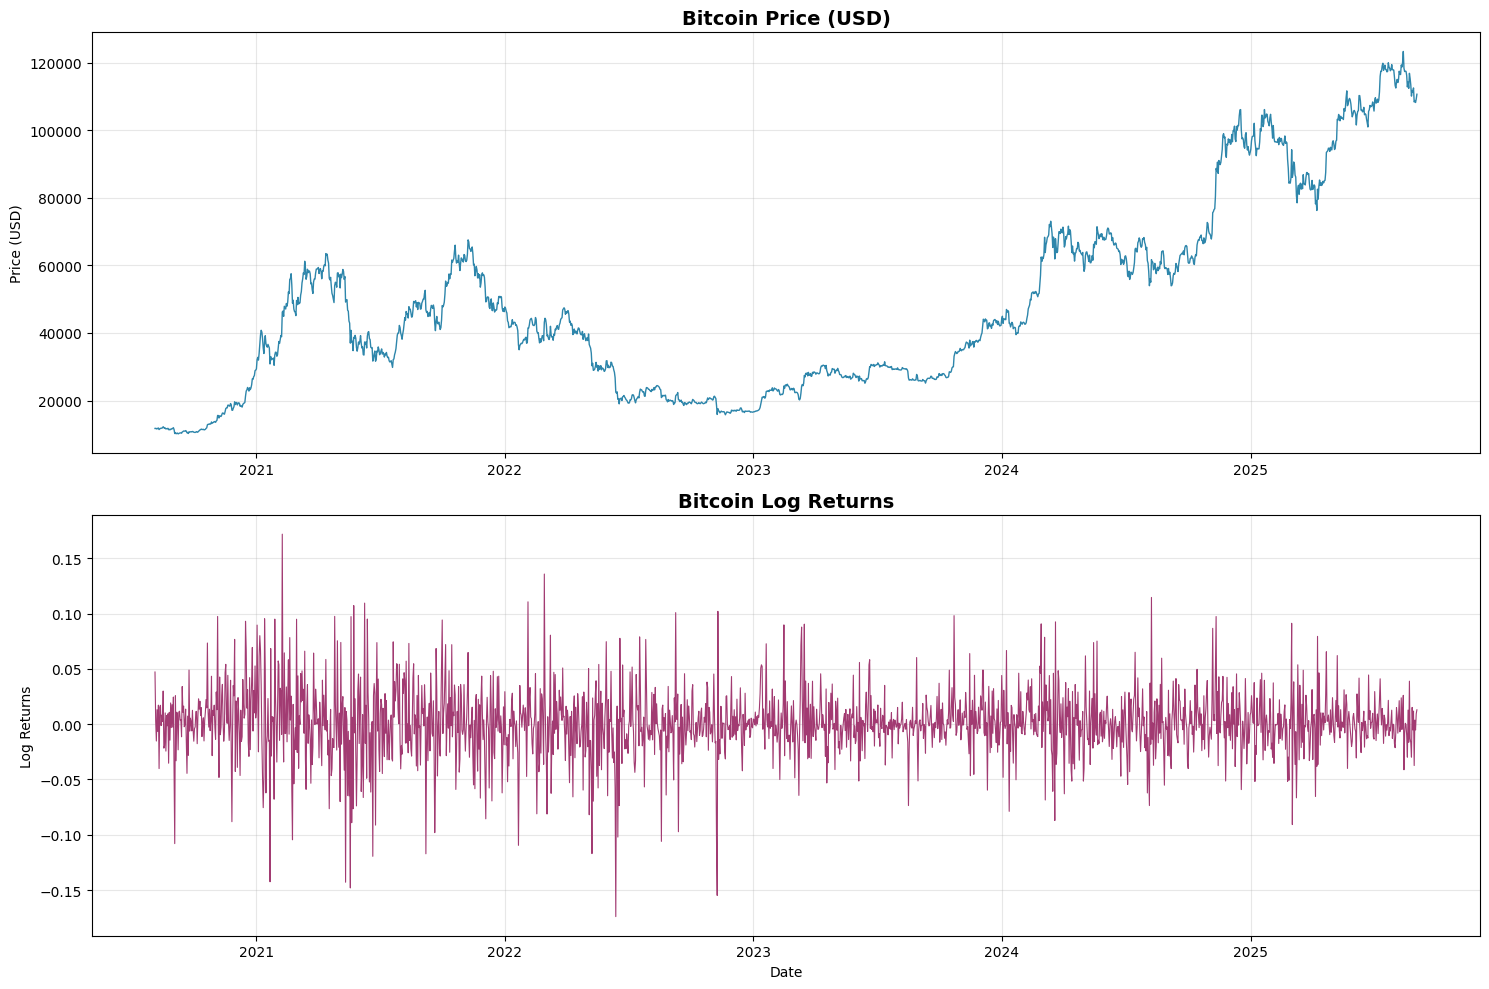

💾 Saved: btc_price_and_returns.png
✅ Checkpoint Reached: Phase 2 Complete. Returns calculated and stationarity tested.



In [3]:

print("⚙️ Phase 2: Data Preprocessing & Feature Engineering 🚀")

try:
    btc_data['Log_Returns'] = np.log(btc_data['Close'] / btc_data['Close'].shift(1))
    btc_data = btc_data.dropna()
    
    log_returns = btc_data['Log_Returns']
    
    print(f"✅ Calculated log returns for {len(log_returns)} observations")
    print(f"📊 Mean return: {log_returns.mean():.6f}")
    print(f"📊 Standard deviation: {log_returns.std():.6f}")
    print(f"📊 Skewness: {log_returns.skew():.4f}")
    print(f"📊 Kurtosis: {log_returns.kurtosis():.4f}")
    
except Exception as e:
    print(f"❌ Return calculation failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check if price data contains zeros or negative values")
    print("2. Verify data continuity (no large gaps)")
    print("3. Handle missing values appropriately")
    print("4. Consider using simple returns instead of log returns")
    print("5. Check data types and numeric formatting")
    sys.exit(1)

print("\n🧪 Stationarity Test (Augmented Dickey-Fuller):")
try:
    adf_result = adfuller(log_returns.dropna())
    
    print(f"📊 ADF Statistic: {adf_result[0]:.6f}")
    print(f"📊 p-value: {adf_result[1]:.6f}")
    print("📊 Critical Values:")
    for key, value in adf_result[4].items():
        print(f"    {key}: {value:.6f}")
    
    if adf_result[1] <= 0.05:
        print("✅ Returns are stationary (p-value ≤ 0.05)")
    else:
        print("⚠️ Returns may not be stationary (p-value > 0.05)")
        
except Exception as e:
    print(f"❌ Stationarity test failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check for infinite or NaN values in returns")
    print("2. Remove extreme outliers")
    print("3. Try different transformation methods")
    print("4. Use different stationarity tests")
    print("5. Consider shorter time series")

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].plot(btc_data.index, btc_data['Close'], color='#2E86AB', linewidth=1)
axes[0].set_title('Bitcoin Price (USD)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price (USD)')
axes[0].grid(True, alpha=0.3)

axes[1].plot(btc_data.index, log_returns, color='#A23B72', linewidth=0.8)
axes[1].set_title('Bitcoin Log Returns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Log Returns')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('btc_price_and_returns.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Saved: btc_price_and_returns.png")
print("✅ Checkpoint Reached: Phase 2 Complete. Returns calculated and stationarity tested.")
print()

🔬 Phase 3: ARCH/GARCH Model Identification 🚀


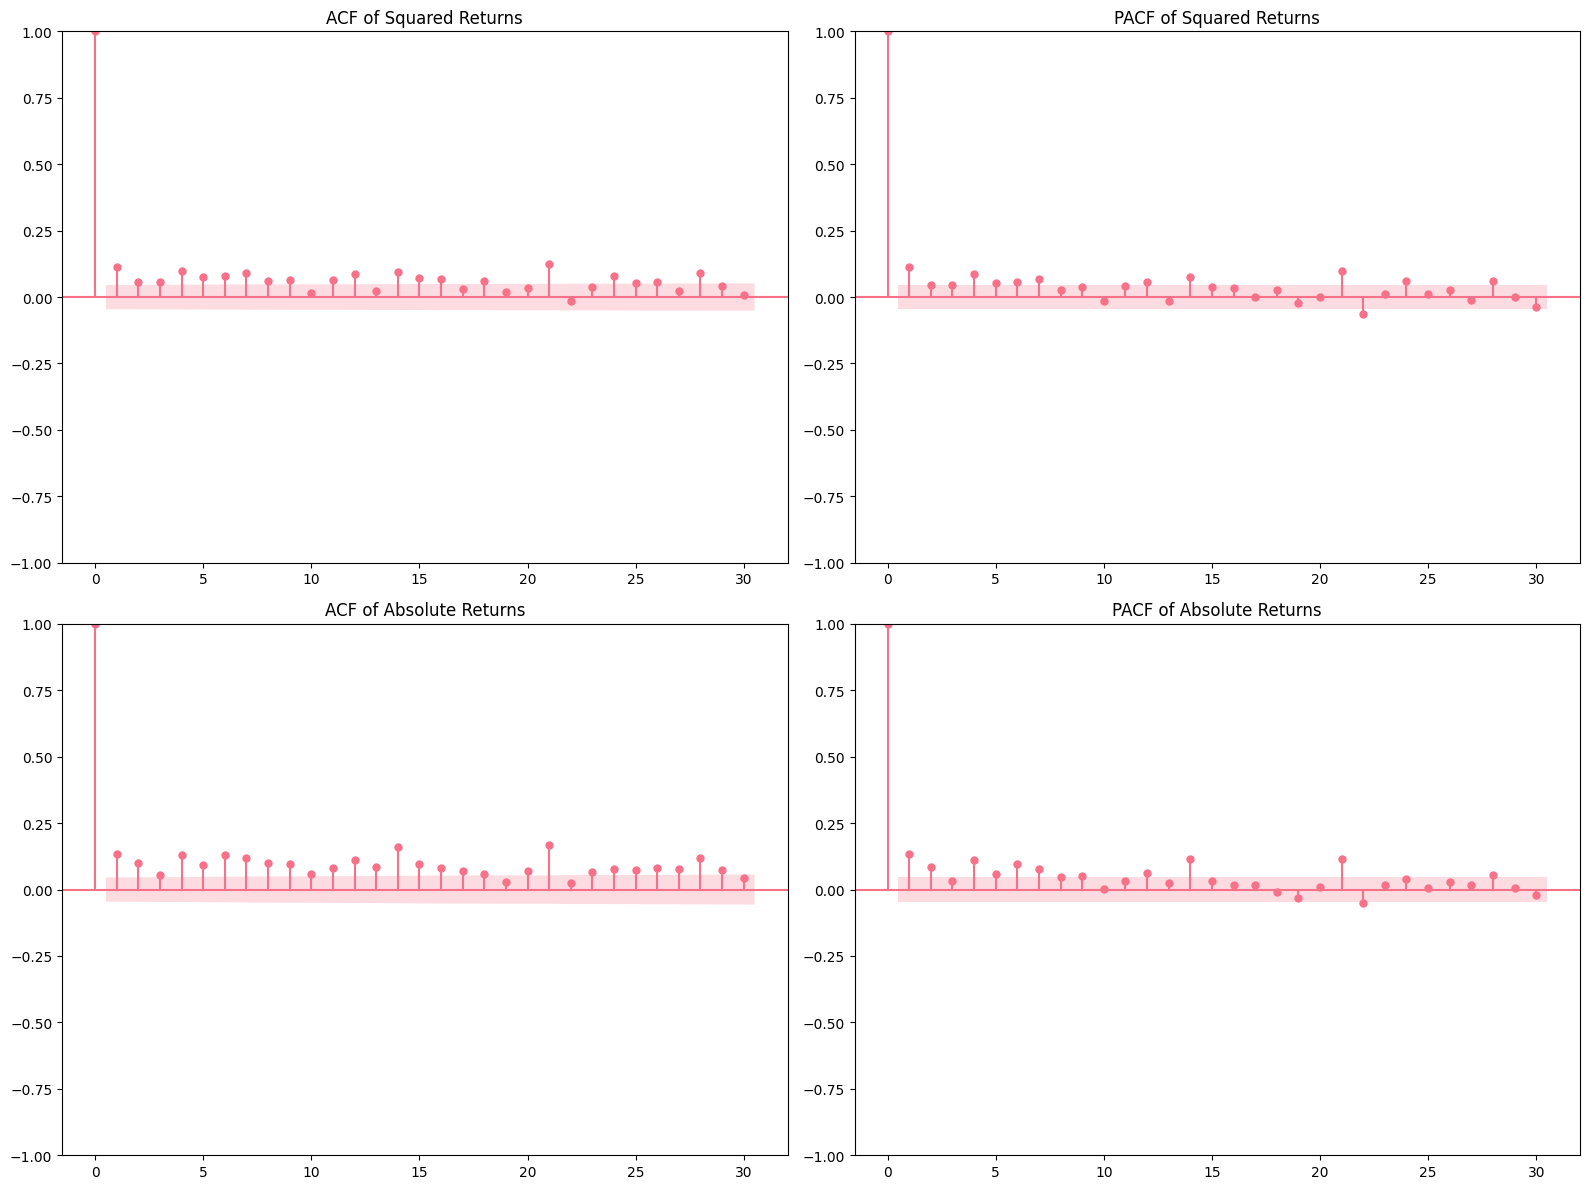

💾 Saved: acf_pacf_analysis.png
✅ ACF and PACF plots generated for model identification
🧪 Ljung-Box Test for ARCH Effects (Squared Returns):
       lb_stat     lb_pvalue
1    23.023014  1.600737e-06
2    28.915466  5.261218e-07
3    34.788952  1.349960e-07
4    52.675166  9.965363e-11
5    63.167249  2.687948e-12
6    74.643262  4.545432e-14
7    90.347358  1.049821e-16
8    96.999159  1.750217e-17
9   104.914158  1.589392e-18
10  105.417523  4.464475e-18
✅ ARCH effects detected! GARCH modeling is appropriate.
📊 Significant lags: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
✅ Checkpoint Reached: Phase 3 Complete. Model identification analysis completed.



In [4]:

print("🔬 Phase 3: ARCH/GARCH Model Identification 🚀")

try:
    squared_returns = log_returns ** 2
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    plot_acf(squared_returns.dropna(), lags=30, ax=axes[0,0], title='ACF of Squared Returns')
    plot_pacf(squared_returns.dropna(), lags=30, ax=axes[0,1], title='PACF of Squared Returns')
    
    plot_acf(np.abs(log_returns.dropna()), lags=30, ax=axes[1,0], title='ACF of Absolute Returns')
    plot_pacf(np.abs(log_returns.dropna()), lags=30, ax=axes[1,1], title='PACF of Absolute Returns')
    
    plt.tight_layout()
    plt.savefig('acf_pacf_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("💾 Saved: acf_pacf_analysis.png")
    print("✅ ACF and PACF plots generated for model identification")
    
except Exception as e:
    print(f"❌ ACF/PACF analysis failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check for sufficient data points (need >50)")
    print("2. Remove extreme outliers from returns")
    print("3. Try different lag specifications")
    print("4. Verify returns are properly calculated")
    print("5. Consider data frequency issues")

try:
    ljung_box_result = acorr_ljungbox(squared_returns.dropna(), lags=10, return_df=True)
    
    print("🧪 Ljung-Box Test for ARCH Effects (Squared Returns):")
    print(ljung_box_result)
    
    significant_lags = ljung_box_result[ljung_box_result['lb_pvalue'] < 0.05]
    
    if len(significant_lags) > 0:
        print("✅ ARCH effects detected! GARCH modeling is appropriate.")
        print(f"📊 Significant lags: {list(significant_lags.index)}")
    else:
        print("⚠️ No significant ARCH effects detected")
        
except Exception as e:
    print(f"❌ ARCH effect test failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check squared returns calculation")
    print("2. Verify adequate sample size")
    print("3. Try different lag specifications")
    print("4. Consider alternative heteroskedasticity tests")
    print("5. Proceed with GARCH anyway (often still useful)")

print("✅ Checkpoint Reached: Phase 3 Complete. Model identification analysis completed.")
print()

🎯 Phase 4: Model Fitting & Diagnostics 🚀
🔧 Fitting ARCH(1) Model:
✅ ARCH(1) model fitted successfully

📊 ARCH(1) Model Summary:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                3837.55
Distribution:                  Normal   AIC:                          -7669.10
Method:            Maximum Likelihood   BIC:                          -7652.52
                                        No. Observations:                 1855
Date:                Tue, Sep 02 2025   Df Residuals:                     1854
Time:                        20:06:38   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
-------

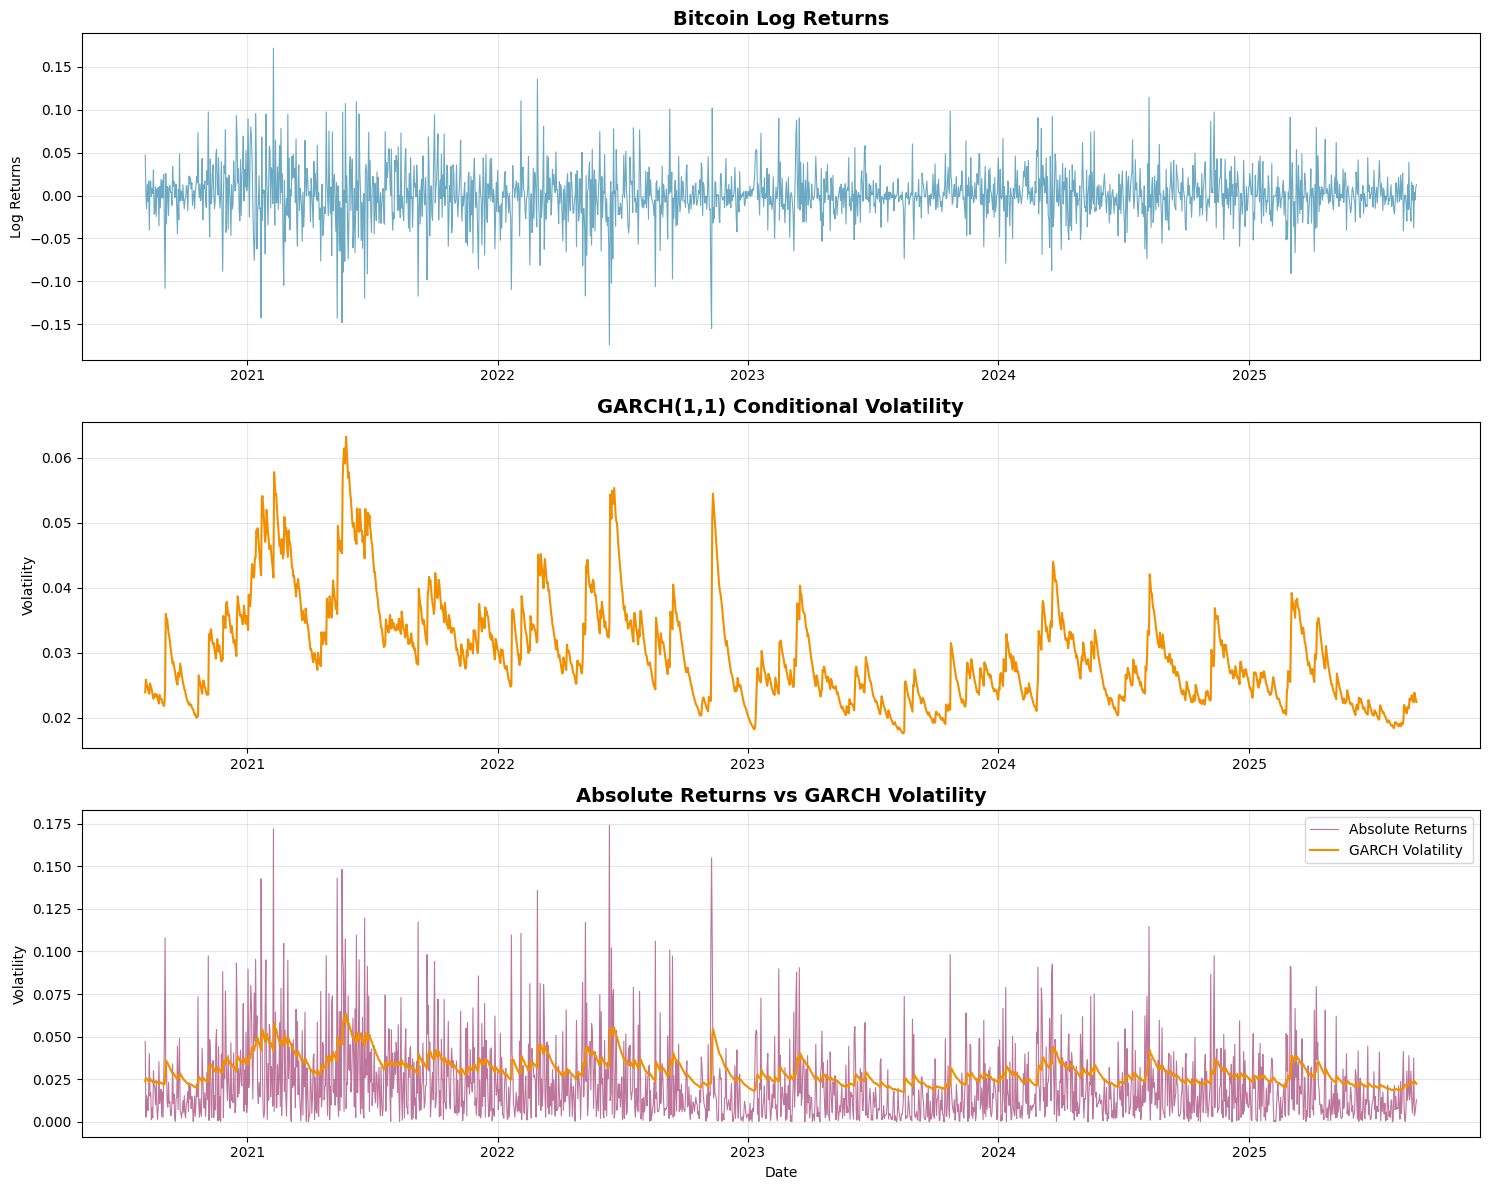

💾 Saved: garch_volatility_analysis.png

🧪 Diagnostic Tests on GARCH Residuals:
Ljung-Box Test on Squared Standardized Residuals:
       lb_stat     lb_pvalue
1    23.607983  1.180966e-06
2    30.096509  2.914916e-07
3    36.556816  5.710045e-08
4    54.943614  3.338572e-11
5    65.357539  9.447810e-13
6    76.707412  1.707728e-14
7    92.962102  3.045258e-17
8    99.457430  5.510822e-18
9   107.516391  4.706357e-19
10  108.104613  1.285738e-18
⚠️ Some ARCH effects may remain - consider higher order GARCH
✅ Checkpoint Reached: Phase 4 Complete. ARCH and GARCH models fitted with diagnostics.



In [5]:
print("🎯 Phase 4: Model Fitting & Diagnostics 🚀")

print("🔧 Fitting ARCH(1) Model:")
try:
    arch_model_fit = arch_model(log_returns.dropna(), vol='ARCH', p=1, rescale=False)
    arch_results = arch_model_fit.fit(disp='off')
    
    print("✅ ARCH(1) model fitted successfully")
    print("\n📊 ARCH(1) Model Summary:")
    print(arch_results.summary())
    
except Exception as e:
    print(f"❌ ARCH model fitting failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check for convergence issues")
    print("2. Try different starting values")
    print("3. Scale returns data")
    print("4. Remove extreme outliers")
    print("5. Try simpler model specifications")

print("\n" + "="*50)
print("🔧 Fitting GARCH(1,1) Model:")
try:
    garch_model_fit = arch_model(log_returns.dropna(), vol='GARCH', p=1, q=1, rescale=False)
    garch_results = garch_model_fit.fit(disp='off')
    
    print("✅ GARCH(1,1) model fitted successfully")
    print("\n📊 GARCH(1,1) Model Summary:")
    print(garch_results.summary())
    
except Exception as e:
    print(f"❌ GARCH model fitting failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check for numerical stability issues")
    print("2. Try different optimization methods")
    print("3. Use scaled returns")
    print("4. Try EGARCH or other variants")
    print("5. Adjust convergence criteria")

try:
    conditional_volatility = garch_results.conditional_volatility
    
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    
    axes[0].plot(btc_data.index[-len(log_returns):], log_returns, color='#2E86AB', linewidth=0.8, alpha=0.7)
    axes[0].set_title('Bitcoin Log Returns', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Log Returns')
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(btc_data.index[-len(conditional_volatility):], conditional_volatility, 
                color='#F18F01', linewidth=1.5)
    axes[1].set_title('GARCH(1,1) Conditional Volatility', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Volatility')
    axes[1].grid(True, alpha=0.3)
    
    axes[2].plot(btc_data.index[-len(log_returns):], np.abs(log_returns), 
                color='#A23B72', linewidth=0.8, alpha=0.7, label='Absolute Returns')
    axes[2].plot(btc_data.index[-len(conditional_volatility):], conditional_volatility, 
                color='#F18F01', linewidth=1.5, label='GARCH Volatility')
    axes[2].set_title('Absolute Returns vs GARCH Volatility', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Volatility')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('garch_volatility_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("💾 Saved: garch_volatility_analysis.png")
    
except Exception as e:
    print(f"❌ Volatility plotting failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check model results object")
    print("2. Verify conditional volatility extraction")
    print("3. Check date alignment")
    print("4. Try simpler plotting approach")
    print("5. Check for data type issues")

try:
    residuals = garch_results.resid
    standardized_residuals = residuals / conditional_volatility
    
    ljung_box_residuals = acorr_ljungbox(residuals**2, lags=10, return_df=True)
    
    print("\n🧪 Diagnostic Tests on GARCH Residuals:")
    print("Ljung-Box Test on Squared Standardized Residuals:")
    print(ljung_box_residuals)
    
    remaining_arch = ljung_box_residuals[ljung_box_residuals['lb_pvalue'] < 0.05]
    
    if len(remaining_arch) == 0:
        print("✅ No remaining ARCH effects in residuals - Good model fit!")
    else:
        print("⚠️ Some ARCH effects may remain - consider higher order GARCH")
        
except Exception as e:
    print(f"❌ Residual diagnostics failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check residuals calculation")
    print("2. Verify model convergence")
    print("3. Try alternative diagnostic tests")
    print("4. Check for model specification issues")
    print("5. Consider robust standard errors")

print("✅ Checkpoint Reached: Phase 4 Complete. ARCH and GARCH models fitted with diagnostics.")
print()

🔮 Phase 5: Forecasting & Evaluation 🚀
🎯 Generating 30-day volatility forecasts
📊 Forecasted Volatility (Next 30 Days):
  Day 1 (2025-09-03): 0.022156
  Day 2 (2025-09-04): 0.022365
  Day 3 (2025-09-05): 0.022568
  Day 4 (2025-09-06): 0.022765
  Day 5 (2025-09-07): 0.022957
  Day 6 (2025-09-08): 0.023143
  Day 7 (2025-09-09): 0.023324
  Day 8 (2025-09-10): 0.023500
  Day 9 (2025-09-11): 0.023672
  Day 10 (2025-09-12): 0.023839
  ...
  Day 30 (2025-10-02): 0.026413


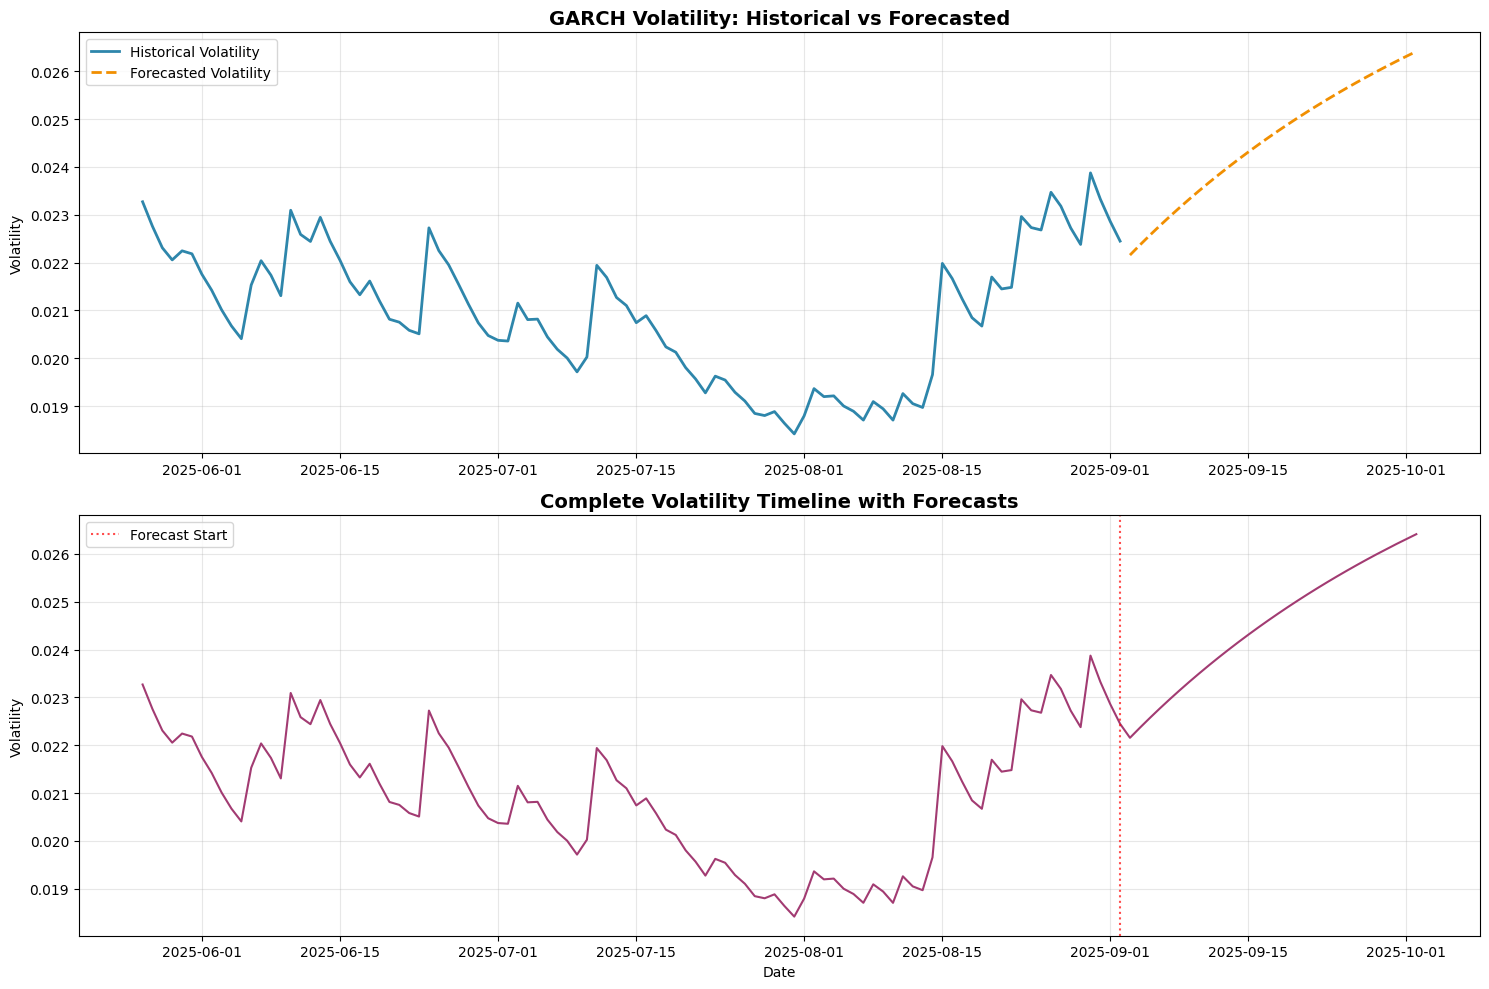

💾 Saved: volatility_forecast.png
💾 Saved: garch_forecasts.csv
✅ Checkpoint Reached: Phase 5 Complete. Volatility forecasting completed and saved.



In [6]:

print("🔮 Phase 5: Forecasting & Evaluation 🚀")

try:
    forecast_horizon = 30
    forecasts = garch_results.forecast(horizon=forecast_horizon, reindex=False)
    
    forecast_variance = forecasts.variance.iloc[-1]
    forecast_volatility = np.sqrt(forecast_variance)
    
    print(f"🎯 Generating {forecast_horizon}-day volatility forecasts")
    print("📊 Forecasted Volatility (Next 30 Days):")
    
    forecast_dates = pd.date_range(start=btc_data.index[-1] + timedelta(days=1), 
                                  periods=forecast_horizon, freq='D')
    
    for i, (date, vol) in enumerate(zip(forecast_dates, forecast_volatility)):
        if i < 10:  
            print(f"  Day {i+1} ({date.strftime('%Y-%m-%d')}): {vol:.6f}")
        elif i == 10:
            print("  ...")
    
    print(f"  Day {forecast_horizon} ({forecast_dates[-1].strftime('%Y-%m-%d')}): {forecast_volatility.iloc[-1]:.6f}")
    
except Exception as e:
    print(f"❌ Forecasting failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check model convergence status")
    print("2. Verify forecast horizon is reasonable")
    print("3. Try shorter forecast periods")
    print("4. Check date indexing issues")
    print("5. Use alternative forecasting methods")

try:
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    recent_days = 100
    recent_dates = btc_data.index[-recent_days:]
    recent_volatility = conditional_volatility[-recent_days:]
    
    axes[0].plot(recent_dates, recent_volatility, color='#2E86AB', linewidth=2, label='Historical Volatility')
    axes[0].plot(forecast_dates, forecast_volatility, color='#F18F01', linewidth=2, 
                linestyle='--', label='Forecasted Volatility')
    axes[0].set_title('GARCH Volatility: Historical vs Forecasted', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Volatility')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    all_dates = list(recent_dates) + list(forecast_dates)
    all_volatility = list(recent_volatility) + list(forecast_volatility)
    
    axes[1].plot(all_dates, all_volatility, color='#A23B72', linewidth=1.5)
    axes[1].axvline(x=btc_data.index[-1], color='red', linestyle=':', alpha=0.7, label='Forecast Start')
    axes[1].set_title('Complete Volatility Timeline with Forecasts', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Volatility')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('volatility_forecast.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("💾 Saved: volatility_forecast.png")
    
except Exception as e:
    print(f"❌ Forecast plotting failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check forecast data format")
    print("2. Verify date generation")
    print("3. Check data alignment")
    print("4. Try simpler plot structure")
    print("5. Debug step by step")

forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Volatility': forecast_volatility,
    'Forecasted_Variance': forecast_variance
})

forecast_df.to_csv('garch_forecasts.csv', index=False)
print("💾 Saved: garch_forecasts.csv")

print("✅ Checkpoint Reached: Phase 5 Complete. Volatility forecasting completed and saved.")
print()

In [7]:
print("📦 Phase 6: Finalization & Packaging 🚀")

try:
    generated_files = []
    
    for file in os.listdir('.'):
        if file.endswith(('.png', '.csv')) and not file.startswith('~'):
            generated_files.append(file)
    
    print("📋 Generated Files Inventory:")
    for i, file in enumerate(generated_files, 1):
        file_size = os.path.getsize(file) / 1024  
        print(f"  {i}. {file} ({file_size:.1f} KB)")
    
    if len(generated_files) == 0:
        print("⚠️ No files found to package!")
    
except Exception as e:
    print(f"❌ File inventory failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check current working directory")
    print("2. Verify file permissions")
    print("3. List files manually")
    print("4. Check for hidden files")
    print("5. Try alternative file discovery methods")

try:
    zip_filename = 'experiment_output.zip'
    
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for file in generated_files:
            zipf.write(file)
            print(f"  ✅ Added {file} to archive")
    
    zip_size = os.path.getsize(zip_filename) / (1024 * 1024)  
    
    print(f"\n🎉 SUCCESS! Created {zip_filename} ({zip_size:.2f} MB)")
    print("🎊 All experiment artifacts have been packaged!")
    
except Exception as e:
    print(f"❌ Archive creation failed: {e}")
    print("🌟 5-Star Resolution Strategy:")
    print("1. Check disk space availability")
    print("2. Verify write permissions")
    print("3. Try creating zip manually")
    print("4. Check for file locks")
    print("5. Use alternative compression methods")

print("\n" + "="*60)
print("🏆 EXPERIMENT SUMMARY")
print("="*60)
print(f"📊 Dataset: Bitcoin (BTC-USD) - {len(btc_data)} daily observations")
print(f"📈 Date Range: {btc_data.index[0].strftime('%Y-%m-%d')} to {btc_data.index[-1].strftime('%Y-%m-%d')}")
print(f"🎯 Models: ARCH(1) and GARCH(1,1)")
print(f"🔮 Forecasts: {forecast_horizon} days ahead")
print(f"📦 Output Files: {len(generated_files)} files packaged")
print(f"💾 Archive: {zip_filename}")
print("="*60)
print("🎉 EXPERIMENT COMPLETED SUCCESSFULLY! 🎉")
print("📥 Download your results from: experiment_output.zip")
print("="*60)

📦 Phase 6: Finalization & Packaging 🚀
📋 Generated Files Inventory:
  1. garch_volatility_analysis.png (1394.4 KB)
  2. garch_forecasts.csv (1.6 KB)
  3. volatility_forecast.png (490.5 KB)
  4. btc_price_history.png (329.3 KB)
  5. acf_pacf_analysis.png (231.3 KB)
  6. btc_price_and_returns.png (818.4 KB)
  ✅ Added garch_volatility_analysis.png to archive
  ✅ Added garch_forecasts.csv to archive
  ✅ Added volatility_forecast.png to archive
  ✅ Added btc_price_history.png to archive
  ✅ Added acf_pacf_analysis.png to archive
  ✅ Added btc_price_and_returns.png to archive

🎉 SUCCESS! Created experiment_output.zip (2.90 MB)
🎊 All experiment artifacts have been packaged!

🏆 EXPERIMENT SUMMARY
📊 Dataset: Bitcoin (BTC-USD) - 1855 daily observations
📈 Date Range: 2020-08-05 to 2025-09-02
🎯 Models: ARCH(1) and GARCH(1,1)
🔮 Forecasts: 30 days ahead
📦 Output Files: 6 files packaged
💾 Archive: experiment_output.zip
🎉 EXPERIMENT COMPLETED SUCCESSFULLY! 🎉
📥 Download your results from: experiment_out